<a href="https://colab.research.google.com/github/madonnaojorin/MAT494/blob/main/4.2_Spectral_Graph_Bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph partition aims to find out a partition such that the cut (the total number of edges between two disjoint sets of nodes) is minimized. For a weighted graph $G = (V,E)$, given a bipartition of $V$ into disjoint $V_1$ and $V_2$ $(V_1 \cup V_2 = V)$, the cut between them can be defined as
$$cut(V_1,V_2) = \sum_{i\in V_1,j\in V_2} M_{ij}.$$

The definition of cut is easily extended to k vertex subsets
$$cut(V_1,V_2,\cdots V_k) = \sum_{i<j} cut(V_i,V_j). $$
The classical graph bipartitioning problem is to find nearly equally-sized vertex subset $V_1,V_2$ of $V$ such that cut$(V^*_1,V_2^*)= \min_{V_1,V_2}\text{cut} (V_1,V_2)$. For this
purpose, let us define the partition vector $\textbf{p}$ that captures this division.

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
data_dir = os.path.expanduser("/content/drive/My Drive/data")

# Loading the data
X = pd.read_csv(os.path.join(data_dir,"CC GENERAL.csv"))
  
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
  
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)
  
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# Preprocessing the data to make it visualizable
  
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the Data
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
  
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481656,-0.097610
4,-0.563512,-0.482506


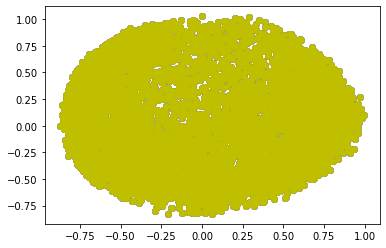

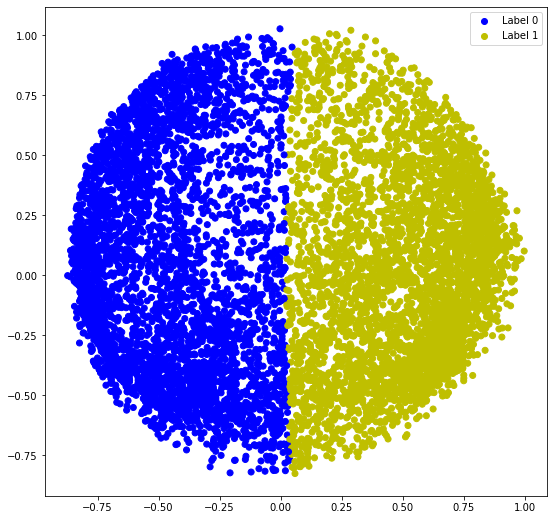

In [14]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [15]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [16]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
  
print(s_scores)

[0.05300611480757429, 0.05667039590382262]


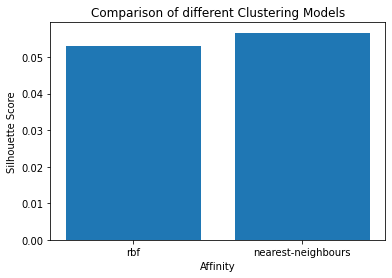

In [17]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

####Lemma 4.2.1 
Given the Laplacian matrix $L$ of $G$ and a partition vector $\textbf{p}$, the Rayleigh Quotient
$$\frac{\textbf{p}^TL\textbf{p}}{\textbf{p}^T\textbf{p}}=\frac{1}{n}\cdot 4 \text{cut}(V_1,V_2)$$

####Theorem 4.2.2 
The serialized partition vector $\textbf{q} = (q_i)$
$$q_i = \begin{cases}+\sqrt{\frac{v_2}{v_1}}, i\in V_1,\\
-\sqrt{\frac{v_2}{v_1}}, i\in V_2.\end{cases}$$
satisfies
1. $$\textbf{q}^TW\textbf{e}=0, \textbf{q}^TW\textbf{q}=v_1+v_2$$
2. $$\frac{\textbf{q}^TL\textbf{q}}{\textbf{q}^TW\textbf{q}}=\frac{\text{cut}(V_1,V_2)}{v_1}+\frac{\text{cut}(V_1,V_2)}{v_2}.$$

The problem 
$$\min_{q\neq 0}\frac{\textbf{q}^TL\textbf{q}}{\textbf{q}^TW\textbf{q}}, \text{ subject to } \textbf{q}^TW\textbf{e}=0, $$
is solved when $\textbf{q}$ is the eigenvector corresponding to the second smallest eigenvalue $\lambda_2$ of the generalized eigenvalue problem,
$$L\textbf{x}=\lambda W \textbf{x}.$$


Now we choose a weight$(i) = 1$ for all vertices $i$. This leads to the ratio-cut objective,
$$\text{Ratio-cut}(V_1,V_2) = \frac{\text{cut}(V_1,V_2)}{|V_1|}+\frac{\text{cut}(V_1,V_2)}{|V_2|}.$$

One commonly used $W = \text{diag}(w_{ii})$ is to choose $w_{ii}$ to be the sum of the weights of edges incident on the node i, i.e., $w_{ii} = \sum_k E_{ik}$. This leads to the normalized cut criterion that was for image segmentation. Note that for this choice of vertex weights, the vertex weight matrix $W$ equals the degree matrix $D$, and weight

$$\sum_{j\in V_i}w_{j j} = \text{cut}(V_1,V_2) +\text{within}(V_i)$$

for $i = 1,2$, where within ($V_i$) is the sum of the weights of edges with both endpoints in $V_i$. 


Then the normalized-cut objective function may be expressed as
$$\text{Normalized-cut}(V_1,V_2) = \frac{\text{cut}(V_1,V_2)}{\sum_{i\in V_1}w_{ii}}+\frac{\text{cut}(V_1,V_2)}{\sum_{i\in V_1}w_{ii}}=2-S(V_1,V_2),$$
where $S(V_1,V_2)=\frac{\text{within}(V_1)}{\sum_{i\in V_1}w_{ii}}+\frac{\text{within}(V_2)}{\sum_{i\in V_2}w_{ii}}$. Note that $S(V_1,V_2)$ describes the strengths of associations within each partition. As a result, minimizing the normalized-cut is to maximize the proportion of edge weights that lie within each partition while balancing the cut. To demonstrate the two cuts, we examine the two examples.